# <u>Multi-Layer Perceptron</u>

Le "Mutli-Layer Perceptron" (MLP) signifie, perceptron multi-couches. C'est une méthode qui permet de créer un réseau de neurones qui prend en entrée des données
à partir d'une couche d'entrée et qui nous donne à partir d'une couche de sortie autant de variables que l'on cherche
à prédire.

Entre ces deux couches, on a entre ces deux couches, des couches cachées qui chacun dispose d'un nombre de neurones:

<img src="https://imgur.com/HV1FPja.png">

<small><small>Source : https://www.tutorialspoint.com/tensorflow/tensorflow_multi_layer_perceptron_learning.htm</small></small>

Une méthode pour créer une réseau de neurones, serait donc d'utiliser la classe `Sequential()` et la classe `Dense()` pour créer 
un modèle utilisant ces différentes couches cachées de la manière suivante:


Nous allons voir si effectivement, le perceptron multi-couches est une méthode viable pour prédire nos différentes classes
présentes dans le dataset CIFAR-10.

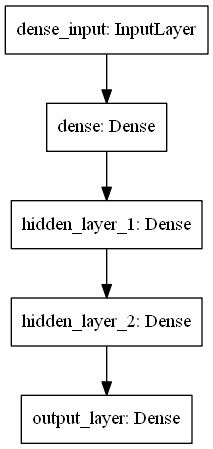

In [1]:
# Import des librairies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.utils import plot_model

# Création des couches du réseau
n_neurons = 32 
n_classes = 10 # dogs, boats, planes...
input_dim = 32 * 32 * 3 # 32px * 32px * 3 (RGB)

input_layer = Dense(n_neurons, input_dim=input_dim)
hidden_layer_1 = Dense(n_neurons, name="hidden_layer_1")
hidden_layer_2 = Dense(n_neurons, name="hidden_layer_2")
output_layer = Dense(n_classes, activation=softmax, name="output_layer")

# Enregistrement du modèle
model = Sequential()
model.add(input_layer)
model.add(hidden_layer_1)
model.add(hidden_layer_2)
model.add(output_layer)

# Affichage de l'image
plot_model(model,to_file="./img/mlp.png")

Avec ce principe, on observe que l'on obtient un schéma de modèle similaire à celui plus haut.
Peut-on obtenir un résultat intéressant avec ce modèle ?

In [2]:
import sys
sys.path.insert(1, '..') # allow import from parent folder
from src.helper import Helper

Après avoir lancé un entraînement de la manière suivante :

```

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from src.helper import Helper

model.compile(
    loss=sparse_categorical_crossentropy,
    metrics=[sparse_categorical_accuracy]
)

helper = Helper()
(x_train, y_train), (x_test, y_test) = helper.get_cifar10_prepared()

helper.fit(
    model, x_train, y_train, 1024, 100, (x_test, y_test), "mlp"
)
```

Voici les résultats que nous obtenons :

In [3]:
Helper().read_log("mlp_1")

=====mlp_1=====
Epoch 1 - loss: 4.033778715057373 ; sparse_categorical_accuracy : 0.14339999854564667 ; val_loss : 3.347454596328735 ; val_sparse_categorical_accuracy : 0.13279999792575836
Epoch 2 - loss: 2.6345446626281737 ; sparse_categorical_accuracy : 0.19896000623703003 ; val_loss : 2.3649721546173095 ; val_sparse_categorical_accuracy : 0.19499999284744263
Epoch 3 - loss: 2.2403154312896727 ; sparse_categorical_accuracy : 0.23975999653339386 ; val_loss : 1.9612107763290405 ; val_sparse_categorical_accuracy : 0.28949999809265137
Epoch 4 - loss: 2.0837595181274415 ; sparse_categorical_accuracy : 0.26976001262664795 ; val_loss : 2.0132433280944824 ; val_sparse_categorical_accuracy : 0.26089999079704285
Epoch 5 - loss: 2.022683025016785 ; sparse_categorical_accuracy : 0.28619998693466187 ; val_loss : 2.103365793609619 ; val_sparse_categorical_accuracy : 0.2572999894618988
Epoch 6 - loss: 1.980586517906189 ; sparse_categorical_accuracy : 0.29910001158714294 ; val_loss : 1.9984187513351

Nous obtenons donc un modèle qui overfit légèrement mais qui reste cependant beaucoup plus 
intéressant qu'un modèle linéaire.

En effet, juste en faisant un simple tirage aléatoire on aurait une précision de 10% approximativement pour chaque tirage.
Or ce modèle peut obtenir 40%, ce qui est simplement 4 fois plus efficace que de faire confiance à la chance.

Mais ne peut-on pas obtenir un résultat encore meilleur en optimisant les paramètres que nous avons donnés ?
Nous avons constaté une croissance au fil du dernier entrainement de notre modèle.

Est-il possible de conclure sur le fait
que plus d'itérations nous aurait permis une meilleure précision globale ?

Nous lançons alors le même entraînement de la manière suivante:

```
helper.fit(
    model, x_train, y_train, 1024, 1000, (x_test, y_test), "mlp"
)
```

Voici les résultats que nous obtenons :

In [4]:
Helper().read_log("mlp_2")

=====mlp_2=====
Epoch 1 - loss: 1.7208738064956666 ; sparse_categorical_accuracy : 0.4074400067329407 ; val_loss : 1.7681454219818116 ; val_sparse_categorical_accuracy : 0.38609999418258667
Epoch 2 - loss: 1.7189831183242799 ; sparse_categorical_accuracy : 0.4101400077342987 ; val_loss : 1.7925985586166382 ; val_sparse_categorical_accuracy : 0.3824000060558319
Epoch 3 - loss: 1.7187734163284303 ; sparse_categorical_accuracy : 0.40709999203681946 ; val_loss : 1.7360876821517945 ; val_sparse_categorical_accuracy : 0.38659998774528503
Epoch 4 - loss: 1.7197451514053346 ; sparse_categorical_accuracy : 0.41029998660087585 ; val_loss : 1.7478821184158324 ; val_sparse_categorical_accuracy : 0.3869999945163727
Epoch 5 - loss: 1.7161135622024537 ; sparse_categorical_accuracy : 0.4119400084018707 ; val_loss : 1.7338244306564332 ; val_sparse_categorical_accuracy : 0.39169999957084656
Epoch 6 - loss: 1.715959115409851 ; sparse_categorical_accuracy : 0.4081999957561493 ; val_loss : 1.73052507629394

On obtient effectivement une meilleure précision globale, cependant, cela prend significativement plus de temps pour obtenir une précision correcte.

De plus on observe un écart entre notre précision d'entrainement et notre précision de validation. Le fait de 
juste augmenter notre nombre d'epochs ne suffit pas. D'autres hyperparamètres pourraient être plus efficace pour la recherche de notre meilleur modèle type "perceptron multi-couches". 

Cependant, tester nos valeurs à la main pourraient prendre beaucoup de temps. Nous allons donc générer un outil
qui va nous permettre de "tuner" nos hyperparamètres pour ne pas que nous ayons à le faire manuellement.

Nous allons donc suivre le principe suivant :

1) La création d'un objet "Tuner" va prendre en compte des listes d'hyperparamètres.

2) Le tuner va permettre de créer des "scénarios" qui permettent la génération de suite d'entrainements.

3) Le tuner va pouvoir lancer un scénario qui durera pour une durée indéfinie.

4) Une fois le scénario terminé, nous pourrons comparer nos modèles grâce à tensorboard et déterminer vers quelle direction
continuer en triant les modèles par un score définit par les paramètres suivants :

* Le niveau d'overfitting
* Le niveau d'underfitting
* L'accuracy du modèle

Nous aurons alors simplement à garder les modèles qui auront le score le plus élevé.

Soit $x$ notre précision d'entraînement et $y$ notre précision de validation.

On pose alors :

<div style="width:100%; text-align:center;">
$
\phi = min(x,y)$ ; $\gamma = max(x,y)
$
</div>
<br>
Alors le score est définit par la formule suivante :
<br><br>
<div style="width:100%; text-align:center;">
$
Score =  10\ \phi\ (1 + \dfrac{\phi}{\gamma})
$
</div>
<br>

Cette formule va alors nous donner un score compris entre 0 et 20 qui est basé sur l'underfitting, l'overfitting et la précision globale de notre modèle.

In [5]:
Helper().evaluate_models(50, "mlp")

[('mlp_57', 10.488130742808309),
 ('mlp_93', 10.462475276126769),
 ('mlp_109', 10.45531667231176),
 ('mlp_107', 10.408366322899017),
 ('mlp_181', 10.348636287786544),
 ('mlp_183', 10.341453287291072),
 ('mlp_51', 10.319985587556252),
 ('mlp_99', 10.280526869971537),
 ('mlp_182', 10.25833856961363),
 ('mlp_94', 10.239554845221267),
 ('mlp_91', 10.216896776588168),
 ('mlp_92', 10.209862921857217),
 ('mlp_101', 10.20865977100931),
 ('mlp_184', 10.207464585619505),
 ('mlp_179', 10.206494315065735),
 ('mlp_177', 10.16713171514307),
 ('mlp_167', 10.14403859993449),
 ('mlp_102', 10.139189156181425),
 ('mlp_173', 10.128373879005892),
 ('mlp_100', 10.118878469336266),
 ('mlp_86', 10.084783844787342),
 ('mlp_180', 10.069043509061167),
 ('mlp_56', 10.05106703775777),
 ('mlp_84', 10.027980756816456),
 ('mlp_78', 10.010260912091356),
 ('mlp_9', 10.008774970311839),
 ('mlp_165', 10.000017659774773),
 ('mlp_151', 9.997334425233603),
 ('mlp_88', 9.996299541387046),
 ('mlp_55', 9.995135648217046),
 ('m

En utilisant un script de génération de modèles on peut donc tuner nos hyperparamètres, et ensuite évaluer les modèles entrainés grâce à notre fonction `evaluate_models(nb_of_models, process_name)`.

Dans un premier temps nous allons générer donc générer un scénario :

In [6]:
from src.tuner import Tuner

# Create tuner
mlp_tuner = Tuner(
    "mlp",
    dropouts=["NoDropout", "DropoutDescending", "DropoutConstant"],
    dropout_values=[0.2, 0.1],
    optimizers=["SGD", "Adam", "Adamax"],
    activation_functions=["tanh", "relu", "sigmoid"],
    batch_sizes=[32, 64, 128, 256]
)

# mlp_tuner.create_scenario("scenario_1")
mlp_tuner.inspect_scenario("scenario_1")

NoDropout,SGD,tanh,32
NoDropout,SGD,tanh,64
NoDropout,SGD,tanh,128
NoDropout,SGD,tanh,256
NoDropout,SGD,relu,32
NoDropout,SGD,relu,64
NoDropout,SGD,relu,128
NoDropout,SGD,relu,256
NoDropout,SGD,sigmoid,32
NoDropout,SGD,sigmoid,64
NoDropout,SGD,sigmoid,128
NoDropout,SGD,sigmoid,256
NoDropout,SGD,softmax,32
NoDropout,SGD,softmax,64
NoDropout,SGD,softmax,128
NoDropout,SGD,softmax,256
NoDropout,Adam,tanh,32
NoDropout,Adam,tanh,64
NoDropout,Adam,tanh,128
NoDropout,Adam,tanh,256
NoDropout,Adam,relu,32
NoDropout,Adam,relu,64
NoDropout,Adam,relu,128
NoDropout,Adam,relu,256
NoDropout,Adam,sigmoid,32
NoDropout,Adam,sigmoid,64
NoDropout,Adam,sigmoid,128
NoDropout,Adam,sigmoid,256
NoDropout,Adam,softmax,32
NoDropout,Adam,softmax,64
NoDropout,Adam,softmax,128
NoDropout,Adam,softmax,256
NoDropout,Adamax,tanh,32
NoDropout,Adamax,tanh,64
NoDropout,Adamax,tanh,128
NoDropout,Adamax,tanh,256
NoDropout,Adamax,relu,32
NoDropout,Adamax,relu,64
NoDropout,Adamax,relu,128
NoDropout,Adamax,relu,256
NoDropout,Ad

Dans notre fichier de scénario, nous disposons de plusieurs composantes.

* `NoDropout`, `DropoutDescending` et `DropoutConstant` : Indiquent si nous utilisons du dropout ou non (afin de régler nos problèmes d'overfitting) et si le dropout est décroissant ou constant pour chacune de nos couches.
* `SGD`, `Adam` et `Adamax` : Sont nos "optimizers" qui permettent d'améliorer la vitesse et la performance d'entrainement de nos modèles.
* `tanh`, `relu` et `sigmoid` : Sont nos fonctions d'activation qui nous permettent d'ajuster le poids et le biais sur nos tenseurs.
* `32`, `64`, `128` et `256` : Sont les "batch sizes" qui controllent le nombre d'échantillons d'entrainements à prendre en compte avant de mettre à jour les paramètres internes du modèle.

Nous allons alors lancer un "scenario" de MLP (`scenario_1.csv` montré plus tôt), qui nous permettra de voir et d'interpréter quels hyperparamètres sont les plus significatifs et quels sont les modèles qui vont générer le score le plus grand.

Cela nous permettra de comprendre si MLP est limité dans le cadre de l'étude de CIFAR-10 ou non.

In [7]:
from src.helper import Helper

helper = Helper()
best_mlp_models = helper.evaluate_models(20,"mlp")

In [8]:
helper.details(best_mlp_models)

{'mlp_57': {'score': 10.488130742808309,
  'acc': '54.98%',
  'loss': '1.2603986255645752',
  'val_acc': '53.27%',
  'val_loss': '1.3233023580551146',
  'state': 'overfitting'},
 'mlp_93': {'score': 10.462475276126769,
  'acc': '57.27%',
  'loss': '1.1912900897598266',
  'val_acc': '53.90%',
  'val_loss': '1.3065014142990112',
  'state': 'overfitting'},
 'mlp_109': {'score': 10.45531667231176,
  'acc': '53.62%',
  'loss': '1.2935910397720336',
  'val_acc': '52.72%',
  'val_loss': '1.3429863445281982',
  'state': 'overfitting'},
 'mlp_107': {'score': 10.408366322899017,
  'acc': '57.30%',
  'loss': '1.181753851623535',
  'val_acc': '53.72%',
  'val_loss': '1.321466114807129',
  'state': 'overfitting'},
 'mlp_181': {'score': 10.348636287786544,
  'acc': '56.41%',
  'loss': '1.2165062464904786',
  'val_acc': '53.24%',
  'val_loss': '1.3077745727539063',
  'state': 'overfitting'},
 'mlp_183': {'score': 10.341453287291072,
  'acc': '53.79%',
  'loss': '1.2857665780258178',
  'val_acc': '52.

## Conclusion
On observe avec MLP que nous avons globalement une meilleure accuracy, néanmoins pour obtenir de meilleurs
résultats et une meilleure précision, cela nécessiterait un temps beaucoup plus long et probablement
plus de techniques pour éviter l'overfitting (data augmentation, regularization...).

Nous verrons à la suite de ces études si de telles méthodes existent et comment elles fonctionnent.


